In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear_1 = torch.nn.Linear(input_dim, 5)
        self.linear_2 = torch.nn.Linear(5, output_dim)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out = self.linear_1(x)
        out = self.linear_2(out)
        out = self.relu(out)
        return out

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

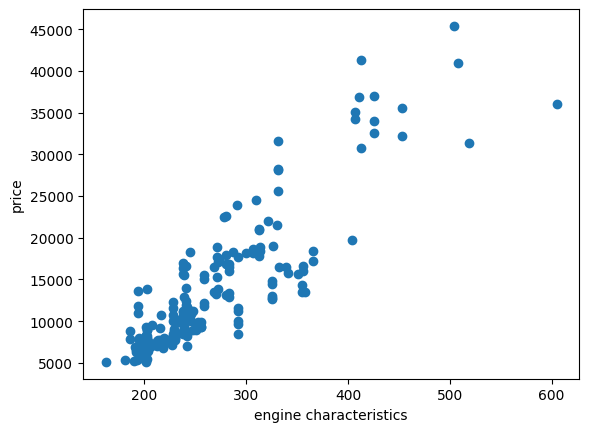

In [12]:
# x - сумма характеристик двигателя
# y - цена
data = pd.read_csv('data3/CarPrice.csv')

x = np.array(data[['enginesize', 'highwaympg', 'horsepower']].sum(axis=1)).reshape(-1, 1)
y = np.array(data['price']).reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel('engine characteristics')
plt.ylabel('price')
plt.show()

In [30]:
model = LinearRegression(1, 1).to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

inputs = torch.from_numpy(x).float()
labels = torch.from_numpy(y).float()

inputs = inputs.to(device)
labels = labels.to(device)

for epoch in range(20000):
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 20000, loss.item()))

Epoch [100/20000], Loss: 222013104.0000
Epoch [200/20000], Loss: 174254672.0000
Epoch [300/20000], Loss: 100619488.0000
Epoch [400/20000], Loss: 47874488.0000
Epoch [500/20000], Loss: 28541618.0000
Epoch [600/20000], Loss: 25155392.0000
Epoch [700/20000], Loss: 24862506.0000
Epoch [800/20000], Loss: 24844048.0000
Epoch [900/20000], Loss: 24838538.0000
Epoch [1000/20000], Loss: 24833052.0000
Epoch [1100/20000], Loss: 24827212.0000
Epoch [1200/20000], Loss: 24821018.0000
Epoch [1300/20000], Loss: 24814478.0000
Epoch [1400/20000], Loss: 24807602.0000
Epoch [1500/20000], Loss: 24800388.0000
Epoch [1600/20000], Loss: 24792856.0000
Epoch [1700/20000], Loss: 24784998.0000
Epoch [1800/20000], Loss: 24776836.0000
Epoch [1900/20000], Loss: 24768374.0000
Epoch [2000/20000], Loss: 24759610.0000
Epoch [2100/20000], Loss: 24750564.0000
Epoch [2200/20000], Loss: 24741238.0000
Epoch [2300/20000], Loss: 24731644.0000
Epoch [2400/20000], Loss: 24721788.0000
Epoch [2500/20000], Loss: 24711676.0000
Epoch 

In [35]:
torch.save(model.state_dict(), 'third.ckpt')

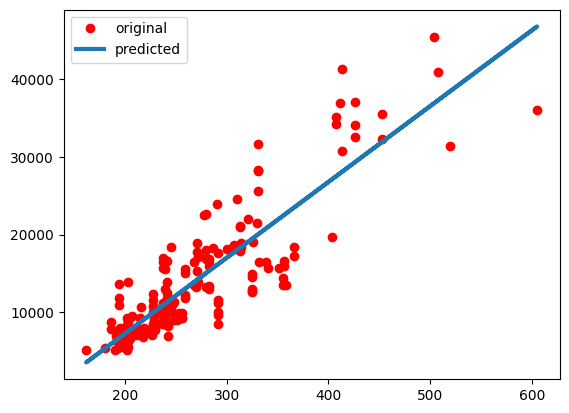

In [36]:
with torch.no_grad():
    model.eval()
    predicted = model.to('cpu')(torch.from_numpy(x).float())
    plt.plot(x, y, 'ro', label='original')
    plt.plot(x, predicted, lw=3, label='predicted')
    plt.legend()
    plt.show()